<span style ='font-family:"Times New Roman"'> 
# <font color='blue'> Data Mining Assignment for Chronic Kidney Disease</font>
</span>    


# Data Description:
**We use the following representation to collect the dataset**

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. class - class

In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import copy
import os
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.metrics import roc_curve, precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Read csv data file 
    from current_working_directory\data

In [3]:
#Read the csv file
curr_dir = os.getcwd()
print(curr_dir)
missing_values = ['\t','?','\t?',np.nan,'NaN']
ckd_data = pd.read_csv(curr_dir+"\data\kidneyChronic.csv",na_values=missing_values)

C:\Users\reenanagrale\Desktop\BITS-Pilani\Courses\Semister 1\Data Mining\Assignments\1


In [4]:
ckd_data.shape

(400, 25)

Size of the dataset is small with only 400 records and number of features are more, so we might run into problem of biased data or overfitting.

We need to analyse the data considering this factor.

In [5]:
#Snippit of data
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
ckd_data.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [7]:
ckd = copy.deepcopy(ckd_data)

**Understand the Data with Data Exploration**

In [8]:
#Adding index column as it will be useful further
ckd_data['SNo'] = range(0,ckd_data.shape[0])

In [9]:
ckd_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'SNo'],
      dtype='object')

In [10]:
# Rename columns 

columns_name = {'age':'Age','bp':'blood_pressure','sg':'specific_gravity','al':'albumin',
                'su':'sugar','rbc':'red_blood_cells','pc':'pus_cells','pcc':'pus_cell_count',
               'ba':'bacteria','bgr':'blood_glucose_random','bu':'blood_urea','sc':'serum_creatinine',
               'sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed_cell_vol',
               'wbcc' : 'white_blood_cell_count','rbcc':'red_blood_cell_c','htn':'hypertension',
               'dm' : 'diabetes_mellitus','cad' : 'coronary_artery_disease',
'appet' : 'appetite','pe' : 'pedal_edema', 'ane' : 'anemia' ,'class ':'class'}

In [11]:
ckd_data.rename(columns=columns_name, inplace=True)

In [12]:
ckd_data.columns

Index(['Age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_count', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_vol', 'white_blood_cell_count',
       'red_blood_cell_c', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class',
       'SNo'],
      dtype='object')

In [13]:
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cells                335 non-null    object 
 7   pus_cell_count           396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

<font color='blue'>Understand how many are null/special character values</font>


In [14]:
#check for null values (?) for each feature
def sanity_check(df):
    
    for col in df.columns:
        nacount = df[col].isnull().sum()
    
        print("Number of records with null values for {} is {}".format(col,nacount))
    return

In [15]:
sanity_check(ckd_data)

Number of records with null values for Age is 9
Number of records with null values for blood_pressure is 12
Number of records with null values for specific_gravity is 47
Number of records with null values for albumin is 46
Number of records with null values for sugar is 49
Number of records with null values for red_blood_cells is 152
Number of records with null values for pus_cells is 65
Number of records with null values for pus_cell_count is 4
Number of records with null values for bacteria is 4
Number of records with null values for blood_glucose_random is 44
Number of records with null values for blood_urea is 19
Number of records with null values for serum_creatinine is 17
Number of records with null values for sodium is 87
Number of records with null values for potassium is 88
Number of records with null values for hemoglobin is 52
Number of records with null values for packed_cell_vol is 71
Number of records with null values for white_blood_cell_count is 106
Number of records wi

# <font color='green'> Observation: 

All records have some values filled. However its observed that some records have special characters.
So apply pre-processing on the data to handle these records. </font>

# <font color='blue'> Data Preprocessing </font>

    Given dataset have some nominal and continuous features so we divide these features in two list named numerical_cols and categorical_cols. Our prediction is on target_col as 'class' 

In [16]:

numerical_cols = ['Age','blood_pressure','blood_urea','serum_creatinine','sodium','potassium','hemoglobin','white_blood_cell_count','red_blood_cell_c','blood_glucose_random','packed_cell_vol']
categorical_cols = ['specific_gravity','albumin','sugar','red_blood_cells','pus_cells','pus_cell_count','bacteria','hypertension','coronary_artery_disease','appetite','pedal_edema','anemia','diabetes_mellitus']
target_col = ['class']

In [17]:
#function to data cleaning on categorical columns
def preprocess_categorical(df,col,mode):
    special_char = ['?','/t','*']
    df[col]=df[col].str.replace('\t','')
    df[col]=df[col].str.replace(' ','')
    if mode:
        replace_value = df[col].mode()[0]
        df[col] = df[col].fillna(replace_value)
    else:
        replace_value = 'No_data'
        df[col] = df[col].fillna(replace_value)
    return df   

In [18]:
#function to data cleaning on numerical columns

def preprocess_numerical(df,col,replace_mode):
    
    if replace_mode=='mean':
        
        replace_value = round(df[col].mean(),1)
        df[col] = df[col].fillna(mean_value)
    if replace_mode == 'median':
        replace_value = round(df[col].median(),1)
        df[col] = df[col].fillna(median)
    if replace_mode =='ffill':
        df[col] = df[col].fillna(method="ffill")
    
    return df 

In [19]:
#backup of original data
ckd = copy.deepcopy(ckd_data)
ckd.head()

,Age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cell_count,bacteria,blood_glucose_random,...,white_blood_cell_count,red_blood_cell_c,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class,SNo
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000.0,NaN,no,no,no,good,no,no,ckd,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,2
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,3
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,4


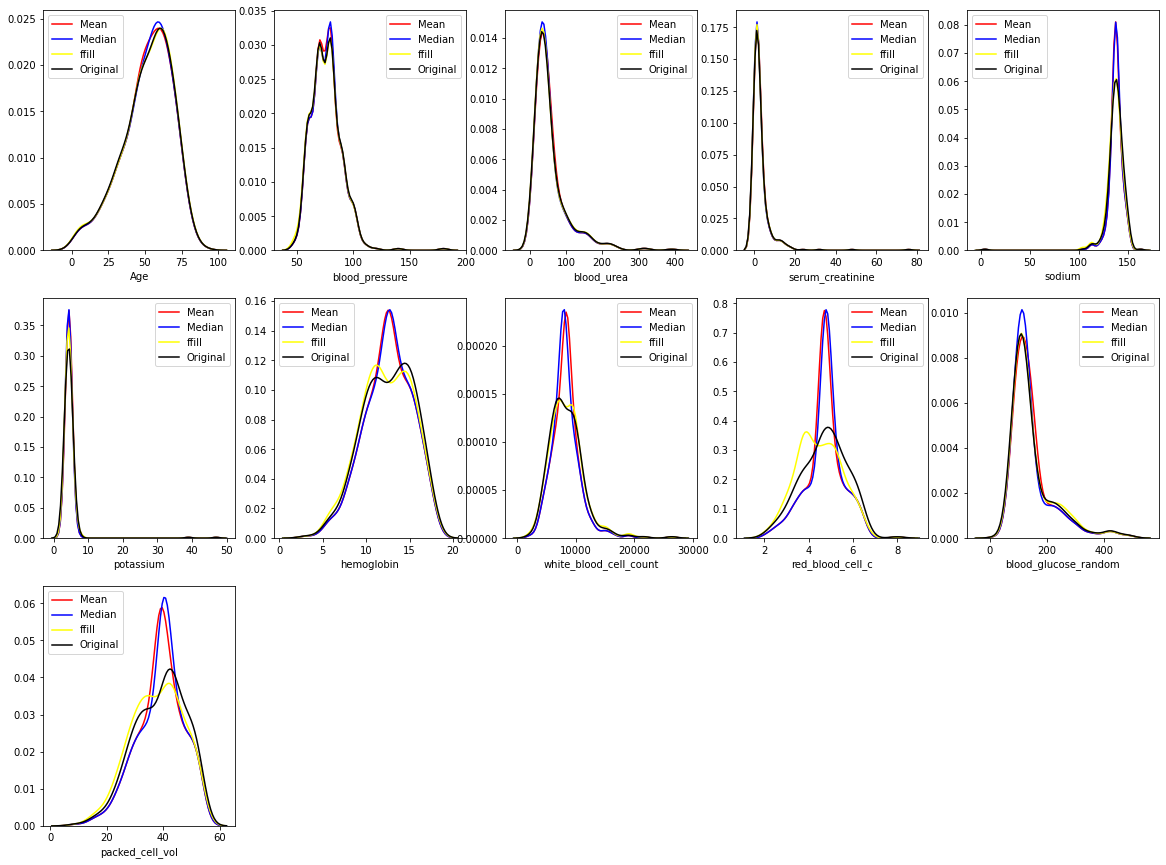

In [20]:
#Distribution of Data and understand which values to replace for NaN for numerical columns
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in numerical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        mean_value = ckd[col].mean()
        median_value = ckd[col].median()
        ckd[col+'_mean'] = ckd[col].fillna(mean_value)
        ckd[col+'_median'] = ckd[col].fillna(median_value)
        ckd['new_'+col] = ckd[col].fillna(method="ffill")
        #Now let's draw the new columns
        sns.kdeplot(ckd[col+'_mean'],color='red',label='Mean')
        sns.kdeplot(ckd[col+'_median'],color='blue',label='Median')
        sns.kdeplot(ckd['new_'+col] ,color='yellow',label='ffill')
        sns.kdeplot(ckd[col],color='black',label='Original')
        plt.xlabel(col)
        plotnumber += 1


    Based on observation, below replace_dict is created which provides columns to replace with mean, median or 
    ffill.

In [21]:
replace_dict={'Age':'ffill','blood_pressure':'mean','blood_urea':'mean','serum_creatinine':'ffill','sodium':'mean','potassium':'mean','hemoglobin':'ffill',
'white_blood_cell_count':'ffill','red_blood_cell_c':'ffill','blood_glucose_random':'ffill','packed_cell_vol':'ffill'}

In [22]:
for col in numerical_cols:
    replace_value = replace_dict[col]
    preprocess_numerical(ckd_data,col,replace_mode=replace_value)
sanity_check(ckd_data)

Number of records with null values for Age is 0
Number of records with null values for blood_pressure is 0
Number of records with null values for specific_gravity is 47
Number of records with null values for albumin is 46
Number of records with null values for sugar is 49
Number of records with null values for red_blood_cells is 152
Number of records with null values for pus_cells is 65
Number of records with null values for pus_cell_count is 4
Number of records with null values for bacteria is 4
Number of records with null values for blood_glucose_random is 0
Number of records with null values for blood_urea is 0
Number of records with null values for serum_creatinine is 0
Number of records with null values for sodium is 0
Number of records with null values for potassium is 0
Number of records with null values for hemoglobin is 0
Number of records with null values for packed_cell_vol is 0
Number of records with null values for white_blood_cell_count is 0
Number of records with null va

# <font color='green'> Observation: 
    
    We have processed all the numerical columns and all shows 0 records with null values/special character. </font>

    Fill all null values for categorical features with No_data and then inspect what values to be replace for No_data based on domain knowledge

In [23]:
#Some features have integer values so converting all categorcial features to object type
for col in categorical_cols:
    ckd_data[col] = ckd_data[col].astype(str)

In [24]:
#Plot bar chart to understand the distribution based on the target values
def plot_categoricalbar(df):
    
    plt.figure(figsize = (20, 15))
    plotnumber = 1
    for col in categorical_cols:
        class_grp = df.groupby(['class',col]).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)
        x=class_grp[col]
        y=class_grp['Count']
        hue=class_grp['class']
        if plotnumber <= 14:
            ax = plt.subplot(3, 5, plotnumber)
            sns.barplot(y=y,x=x,hue=hue)
            plt.xlabel(col)

        plotnumber += 1
    

C:\Users\reenanagrale\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\reenanagrale\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


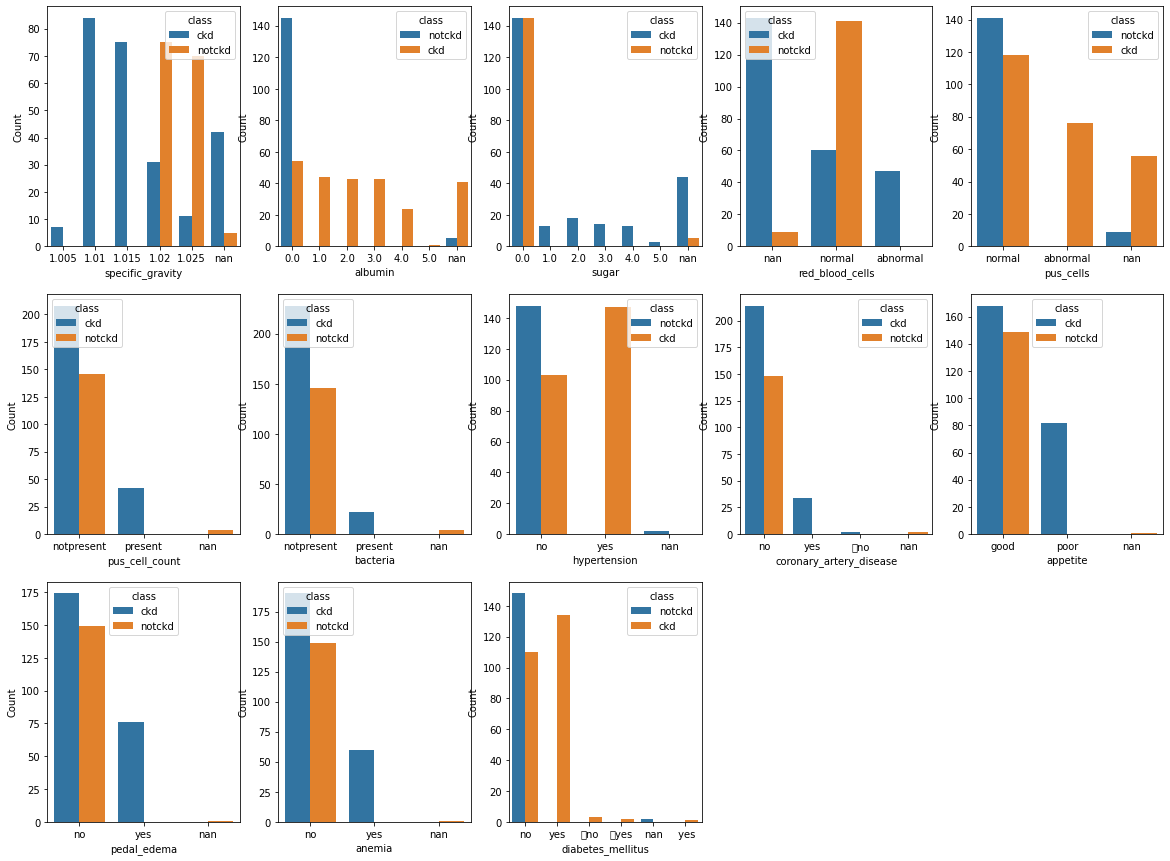

In [25]:
plot_categoricalbar(ckd_data)

We observe that some features have some garbage value for yes and no, we replace garbage no = no and replace garbase yes = yes.

In [26]:
for col in categorical_cols:
    
    ckd_data[col]=ckd_data[col].str.replace('\tno','no')
    ckd_data[col]=ckd_data[col].str.replace('\tyes','yes')
    ckd_data[col]=ckd_data[col].str.replace('nan','No_data')
    

    Remaining categorical features, we observe some of the fields have records with null values and just replacing them with mode will create biased features data. Initially we replace with No_data
    We try to understand from the domain knowledge of these features and if we can replace it with appropriate values with referencing to other features - Features - specific_gravity,albumin,red_blood_cells,pus_cells.
    
    Other categorical features which does not significantly change the distribution are replaced with mode value. Features - coronary_artery_disease,bacteria,pus_cell_count, sugar, pedal_edema, appetite,  

In [27]:
no_mode = ['specific_gravity','albumin','red_blood_cells','pus_cells','diabetes_mellitus','hypertension']
for col in categorical_cols:
    if col not in no_mode:
        ckd_data = preprocess_categorical(ckd_data,col,mode=True)
    else:
        ckd_data = preprocess_categorical(ckd_data,col,mode=False)

In [28]:
sanity_check(ckd_data)

Number of records with null values for Age is 0
Number of records with null values for blood_pressure is 0
Number of records with null values for specific_gravity is 0
Number of records with null values for albumin is 0
Number of records with null values for sugar is 0
Number of records with null values for red_blood_cells is 0
Number of records with null values for pus_cells is 0
Number of records with null values for pus_cell_count is 0
Number of records with null values for bacteria is 0
Number of records with null values for blood_glucose_random is 0
Number of records with null values for blood_urea is 0
Number of records with null values for serum_creatinine is 0
Number of records with null values for sodium is 0
Number of records with null values for potassium is 0
Number of records with null values for hemoglobin is 0
Number of records with null values for packed_cell_vol is 0
Number of records with null values for white_blood_cell_count is 0
Number of records with null values f

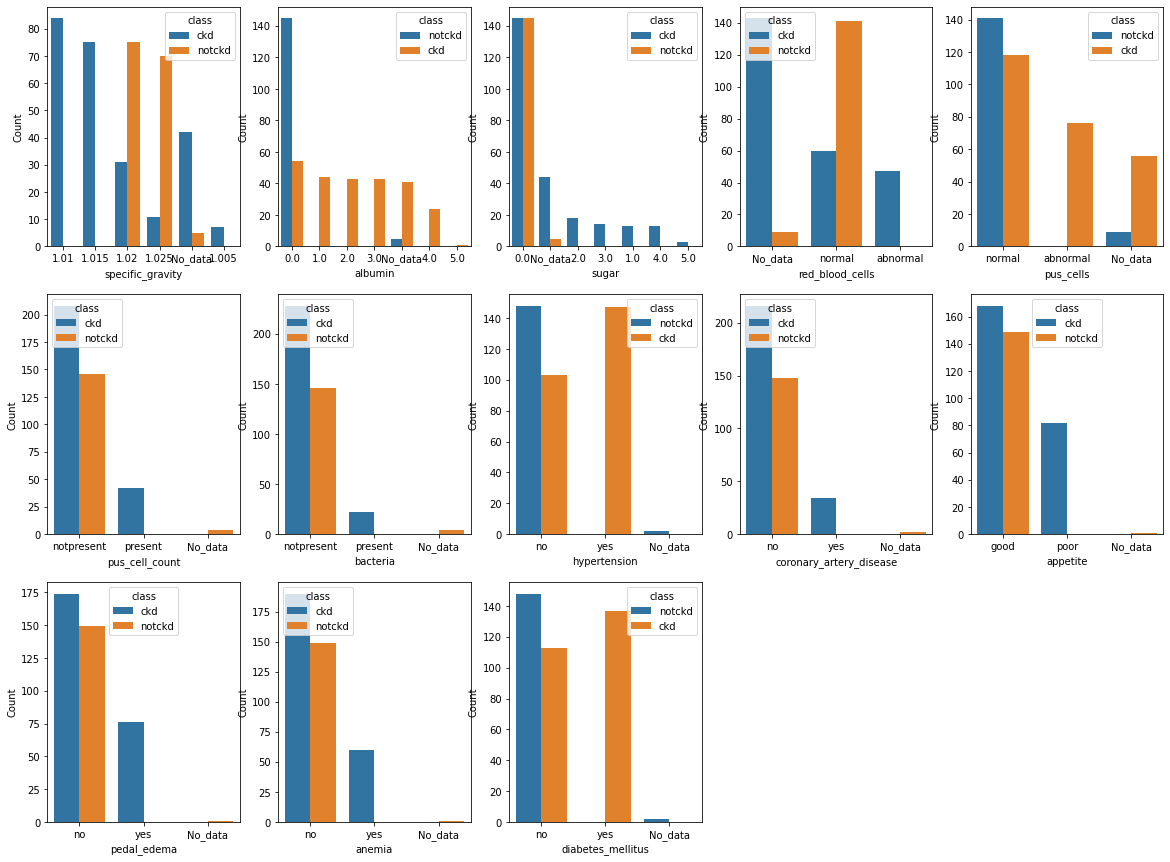

In [29]:
plot_categoricalbar(ckd_data)

  **<font color='green'>Great!, all the special character records and null records are handled. Data Cleansing process is completed.** 
   
   **Now we proceed with data exploration to understand some basic statistical information on each columns.**</font>

# <font color='blue'> **DATA EXPLORATION** </font>

***Working on Age column***

In [30]:
ckd_data['Age'].unique()

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., 73., 70., 65., 76., 72., 82., 46., 45.,
       35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5., 74.,
       38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66., 81.,
       14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78., 19.,
        2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [31]:
#convert age into age group by binning method
#create age group
#Children :1 - 12
#teen :13 - 19
#young:20 - 35
#middle age - 36 - 50
#old - 50 and above
age_bins = [1,12,19,35,50,100]
labels_bin = ['Children','Teen','Young','Middle_age','Old']
ckd_data['age_group'] = pd.cut(ckd_data.Age,age_bins,labels=labels_bin,include_lowest=True)


In [32]:
ckd_data['age_group'].value_counts()

Old           226
Middle_age     98
Young          54
Children       14
Teen            8
Name: age_group, dtype: int64

In [33]:
age_class_grp = ckd_data.groupby(['class','age_group']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

In [34]:
def plot_barchart(x,y,hue):
    plt.figure(figsize=(6,6))
    sns.barplot(y=y,x=x,hue=hue)
    
    

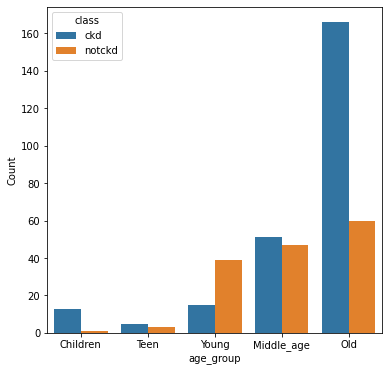

In [35]:
plot_barchart(x=age_class_grp['age_group'],y=age_class_grp['Count'],hue=age_class_grp['class'])

# <font color='green'> Observation: 
    
    It is observed that major Chronic Kidney disease is observed for OLD Age people ie 50 and years above. 

    Middle age people have 50% changes of impacting with Chronic Kidney Disease. We focus to understand what causes more impact of Middle age and Old age people with Kidney diseases.</font>

***Working on specific gravity column***

    unique values of urine specific gravity for the given dataset

    sg is nominal data feature, 
        well hydrated < 1.010
        Minimal dehydrated 1.010 - 1.020
        significant dehydrated 1.021 - 1.030
        Seriuos dehydration > 1.030
    



    specific_gravity refers to values in range as below and suggests the hydration
    We do not have any other columns provided which could provide any suggestion for missing values.
    
    So we keep it as No_data
    '''well hydrated < 1.010
    Minimal dehydrated 1.010 - 1.020
    significant dehydrated 1.021 - 1.030
    Seriuos dehydration > 1.030
    '''

In [36]:
sg_class_grp = ckd_data.groupby(['class','specific_gravity']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

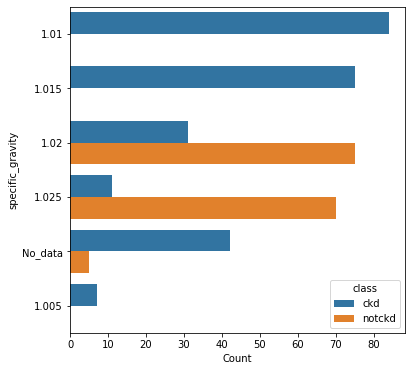

In [37]:
plot_barchart(y=sg_class_grp['specific_gravity'],x=sg_class_grp['Count'],hue=sg_class_grp['class'])

 **Working with albumin**
 
     Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. A healthy kidney doesn’t let albumin pass into the urine. A damaged kidney lets some albumin pass into the urine. 

    0 - Normal, 1-Mild, 2-High,3-Very High, 4-Servere 5-Extreme

In [38]:
ckd_data['albumin'].value_counts()

0.0        199
No_data     46
1.0         44
2.0         43
3.0         43
4.0         24
5.0          1
Name: albumin, dtype: int64

In [39]:
al_class_grp = ckd_data.groupby(['class','albumin']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

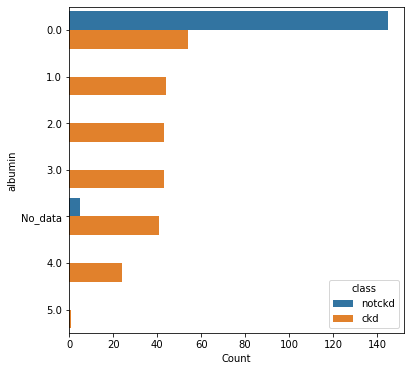

In [40]:
plot_barchart(y=al_class_grp['albumin'],x=al_class_grp['Count'],hue=al_class_grp['class'])

    It is suggested that anything above normal range of albumin value means person is suffering from CKD.

**Working with red_blood_cells**

    red_blood_cells is nominal data defined from red_blood_cell_count values. 

    Normal range of rbcc is 4.2 to 6.1. Anything above or below this range is treated abnormal. So, creating new class as rbc_class filling the missing values as well based on range of rbcc

In [41]:
ckd_data['red_blood_cells'].value_counts()

normal      201
No_data     152
abnormal     47
Name: red_blood_cells, dtype: int64

In [42]:
ckd_data['rbc_class'] = np.where(((ckd_data['red_blood_cell_c'].astype(float)>=4)&(ckd_data['red_blood_cell_c'].astype(float)<=6.1)),'normal','abnormal')

In [43]:
rbc_class_grp = ckd_data.groupby(['class','rbc_class']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

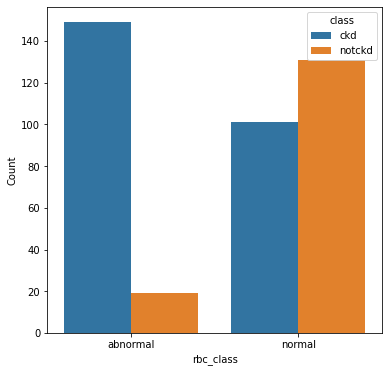

In [44]:
plot_barchart(x=rbc_class_grp['rbc_class'],y=rbc_class_grp['Count'],hue=rbc_class_grp['class'])

    Normal range of rbcc is 4.2 to 6.1. Anything above or below this range is treated abnormal. So, creating new class as rbc_class. 
    Based on the observation, it is suggested that people suffering with ckd has reported with abnormal RBC values.

**Working with pus_cells features**

In [45]:
ckd_data['pus_cells'].value_counts()

normal      259
abnormal     76
No_data      65
Name: pus_cells, dtype: int64

In [46]:
pus_class_grp = ckd_data.groupby(['class','pus_cells']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

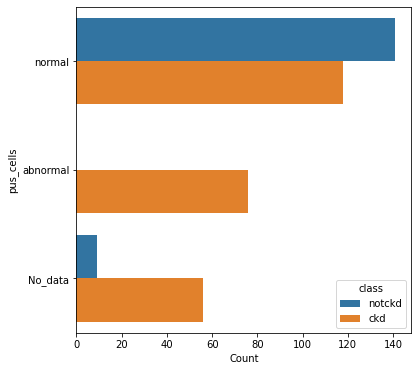

In [47]:
plot_barchart(pus_class_grp['Count'],pus_class_grp['pus_cells'],pus_class_grp['class'])

# <font color='green'> Observation: 
       We observe so distinct inference can be obtained from this feature. As normal and abnormal pus_cells values have reported with ckd. </font>

**Working with diabetes_mellitus features**

In [48]:
ckd_data['diabetes_mellitus'].value_counts()

no         261
yes        137
No_data      2
Name: diabetes_mellitus, dtype: int64

From the medical records we understand if blood_glucose_random > 130 then diabetes_mellitus = yes else no only for No_data entries

In [49]:
ckd_data['diabetes_mellitus']=np.where(((ckd_data['diabetes_mellitus']=='No_data')&(ckd_data['blood_glucose_random'].astype(float)<130)),'no',ckd_data['diabetes_mellitus'])

In [50]:
ckd_data['diabetes_mellitus'].value_counts()

no     263
yes    137
Name: diabetes_mellitus, dtype: int64

In [51]:
dm_class_grp = ckd_data.groupby(['class','diabetes_mellitus']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

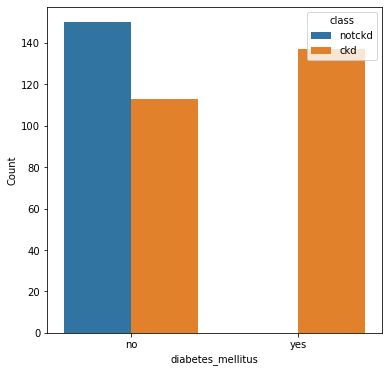

In [52]:
plot_barchart(dm_class_grp['diabetes_mellitus'],dm_class_grp['Count'],dm_class_grp['class'])

# <font color='green'> Observation: 
       We observe so distinct inference can be obtained from this feature. As normal and abnormal pus_cells values have reported with ckd.
    

**checking numerical features distribution**

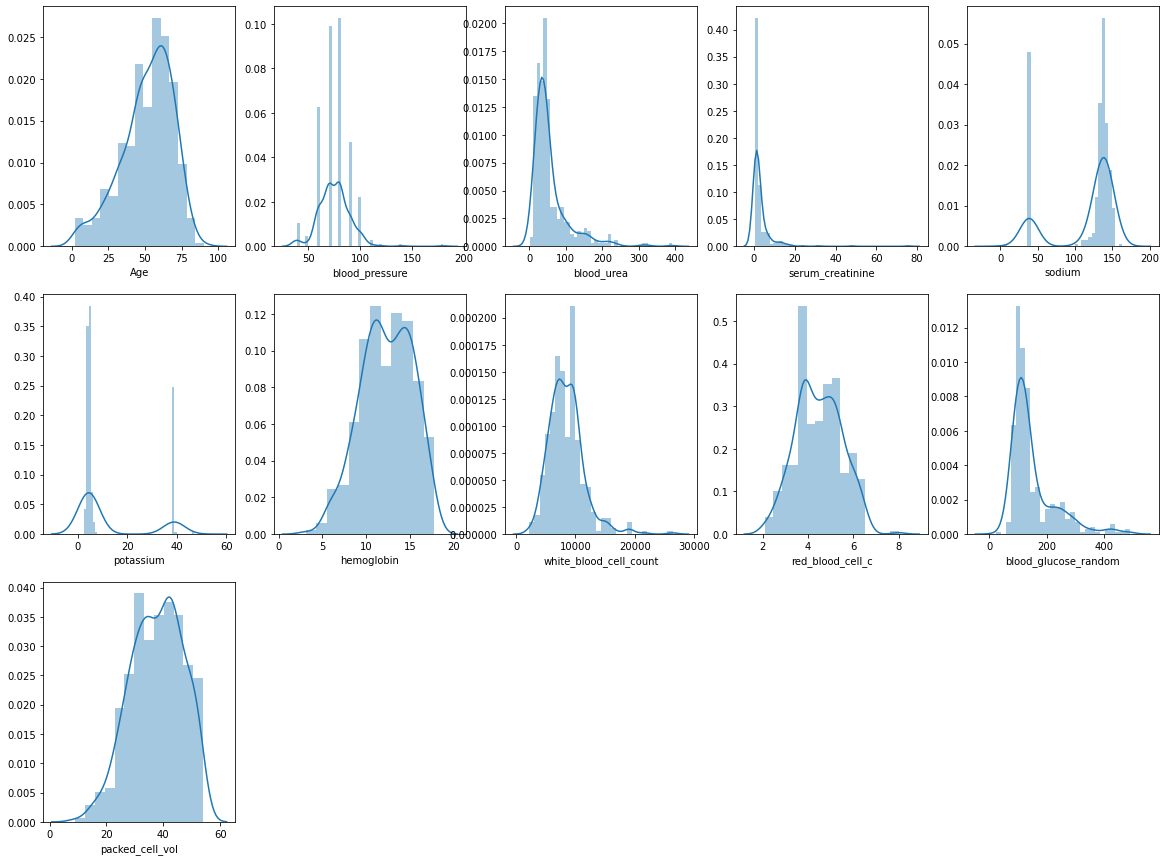

In [53]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(ckd_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

<font color='Green'> **Result:
    Data exploration process is completed.**</font>

# <font color='blue'> **Data Transformation for Model building** </font>


    In this step we transform the data for modelling requirement.
        1. Label Encoding
        2. Data Scaling
        3. Feature selection with correlation analysis

In [54]:
le = LabelEncoder()
ckd_data['class_label'] = le.fit_transform(ckd_data['class'])

In [55]:
#Understanding the correlation for categorical data with Point Biserial Correlation Analysis
for col in categorical_cols:
    le = LabelEncoder()
    ckd_data[col] = le.fit_transform(ckd_data[col])
    pbc = pointbiserialr(ckd_data[col],ckd_data['class_label'])
    
    if  -0.29<=pbc[0]<=0.0:
        relationship = "Negatively Neglible Correlation"
    elif -0.49<=pbc[0]<=0.30:
        relationship = "Negatively Low Correlation"
    elif -0.69<=pbc[0]<=-0.50:
        relationship = "Negatively Moderate Correlation"
    elif -0.90<=pbc[0]<=-0.70:
        relationship = "Negatively High Correlation"
    elif -1.00<=pbc[0]<=0.90:
        relationship = "Negatively Highly Correlation"
    
    elif 0.30<=pbc[0]<= 0.49:
        relationship = "Positively Low Correlation"
    elif 0.50<=pbc[0]<=.69:
        relationship = "Positively Moderate Correlation"
    elif 0.70<=pbc[0]<=.90:
        relationship = "Positively High Correlation"
    elif 0.90<=pbc[0]<=1.00:
        relationship = "Positively Highly Correlation"
    
    print("\n Column "+col+" is "+relationship+" with target class.")
    print("Correlation Coefficient: {}".format(pbc[0]))


 Column specific_gravity is Negatively Highly Correlation with target class.
Correlation Coefficient: 0.4354148169510917

 Column albumin is Negatively Moderate Correlation with target class.
Correlation Coefficient: -0.529042571668327

 Column sugar is Negatively Low Correlation with target class.
Correlation Coefficient: -0.34467698679166486

 Column red_blood_cells is Negatively Highly Correlation with target class.
Correlation Coefficient: 0.6299775673681902

 Column pus_cells is Negatively Highly Correlation with target class.
Correlation Coefficient: 0.4035745635462236

 Column pus_cell_count is Negatively Neglible Correlation with target class.
Correlation Coefficient: -0.2894979697117901

 Column bacteria is Negatively Neglible Correlation with target class.
Correlation Coefficient: -0.22121203057673056

 Column hypertension is Negatively Moderate Correlation with target class.
Correlation Coefficient: -0.5928952144890441

 Column coronary_artery_disease is Negatively Neglible

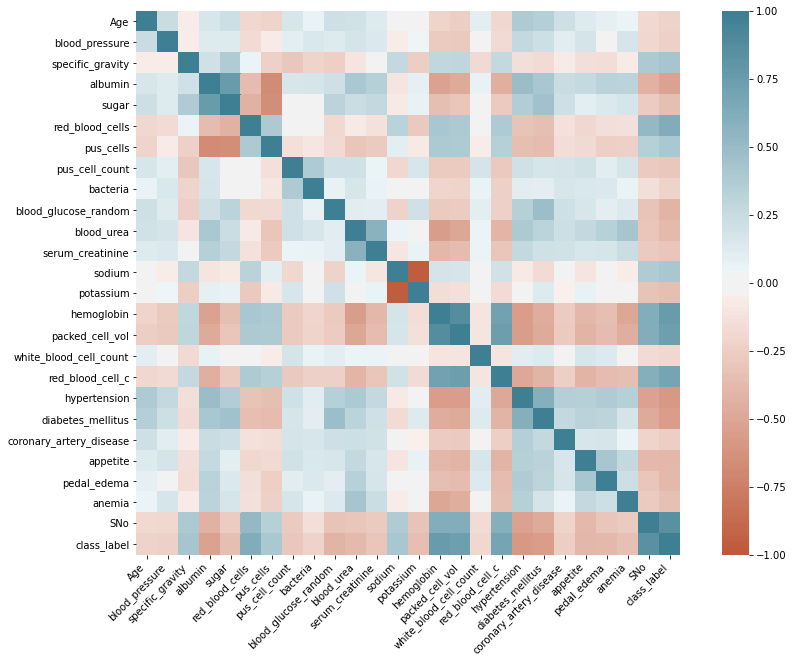

In [56]:
#Correlation for all features/columns.
corr = ckd_data.corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(22, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Feature Selection**

**Chi-square Test for feature selection**

In [57]:
from sklearn.feature_selection import chi2

In [58]:
column_list = numerical_cols + categorical_cols
X_df = copy.deepcopy(ckd_data[column_list])
Y_df = copy.deepcopy(ckd_data[target_col])

In [59]:
chi_scores = chi2(X_df,Y_df)

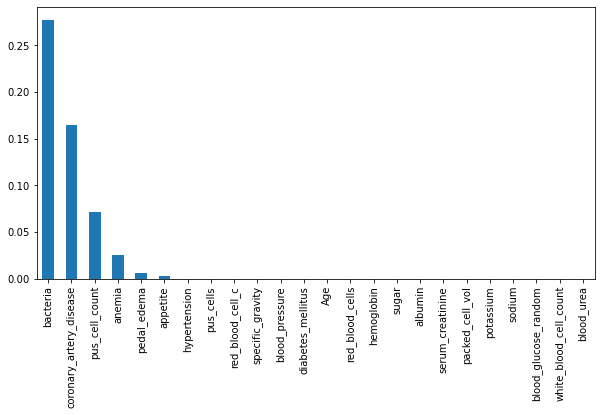

In [60]:
p_values = pd.Series(chi_scores[1],index = X_df.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

# <font color='green'> Observation: 
        
        Based on the Chi-square test we observe that bacteria, cad, pus_cell_count column has very high p-value and so we can remove this feature from our dataset and understand the model performance.
        
        Based on the coefficient correlation matrix, we understand that hemoglobin, packed_cell_vol, red_blood_cell_count, hypertension,red_blood_cell, specific_gravity, blood_urea, albumin have high correlation with the target label. These form strong predictors in our model. This is also confirmed with Chi-square test


In [61]:
#New list after removal of potassium feature
new_numerical_cols = ['Age',
 'blood_pressure',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'hemoglobin',
 'white_blood_cell_count',
 'red_blood_cell_c',
 'blood_glucose_random',
 'packed_cell_vol',
'potassium']
new_categorical_cols = ['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cells',
 
 'hypertension',
 'appetite',
 'pedal_edema',

 'anemia',
 'diabetes_mellitus']
target_col = ['class']

In [62]:
ckd_model_data = ckd_data[new_numerical_cols+new_categorical_cols+target_col]


**Data Scaling**

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ckd_model_data[new_numerical_cols+new_categorical_cols])

MinMaxScaler()

In [64]:
scaled_features = scaler.transform(ckd_model_data[new_numerical_cols+new_categorical_cols])
print(scaled_features)

[[0.52272727 0.29136063 0.0885751  ... 0.5        0.5        1.        ]
 [0.05681818 0.07876882 0.042362   ... 0.5        0.5        0.        ]
 [0.68181818 0.29136063 0.1322208  ... 0.5        1.         1.        ]
 ...
 [0.11363636 0.29136063 0.06290116 ... 0.5        0.5        0.        ]
 [0.17045455 0.14963276 0.12451861 ... 0.5        0.5        0.        ]
 [0.63636364 0.29136063 0.042362   ... 0.5        0.5        0.        ]]


In [65]:
scaled_features.shape

(400, 21)

In [66]:
#Final dataset to be used for model building
ckd_model_data.head()

,Age,blood_pressure,blood_urea,serum_creatinine,sodium,hemoglobin,white_blood_cell_count,red_blood_cell_c,blood_glucose_random,packed_cell_vol,...,albumin,sugar,red_blood_cells,pus_cells,hypertension,appetite,pedal_edema,anemia,diabetes_mellitus,class
0,48.0,80.0,36.0,1.2,38.884498,15.4,7800.0,5.2,121.0,44.0,...,1,0,0,2,2,1,1,1,1,ckd
1,7.0,50.0,18.0,0.8,38.884498,11.3,6000.0,5.2,121.0,38.0,...,4,0,0,2,1,1,1,1,0,ckd
2,62.0,80.0,53.0,1.8,38.884498,9.6,7500.0,5.2,423.0,31.0,...,2,3,2,2,1,2,1,2,1,ckd
3,48.0,70.0,56.0,3.8,111.000000,11.2,6700.0,3.9,117.0,32.0,...,4,0,2,1,2,2,2,2,0,ckd
4,51.0,80.0,26.0,1.4,38.884498,11.6,7300.0,4.6,106.0,35.0,...,2,0,2,2,1,1,1,1,0,ckd


# <font color='blue'> **Model building** </font>

In [67]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix,classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Part 1 - Select the train test data sample by Shuffle = True**

In [68]:
X_df = ckd_model_data[new_numerical_cols+new_categorical_cols]
Y_df = ckd_model_data[target_col]

In [69]:
#
def classification_model(trainX_data,testX_data,trainY_data,testY_data):
    models_list = [LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier]
    df = pd.DataFrame(columns=['Classifier','Train_Acc','Test_Acc'])
    #record=[]
    for m in models_list:
        classifier = m()
        model = classifier.fit(trainX_data, trainY_data.values.ravel())
        predicted_y = model.predict(testX_data)
        model_name = str(m).split('.')[-1]
        train_acc = round(model.score(trainX_data,trainY_data)*100,1)
        test_acc = round(accuracy_score(predicted_y,testY_data)*100,1)
        print("\n ********<'Measures for model {} **********".format(model_name))
        print("Accuracy of model on train data : {}% ".format(train_acc))
        print("Accuracy of model on test data: {}% ".format(test_acc))
        print("F1 score of model : {} ".format(f1_score(testY_data,predicted_y,average=None)))
        #plot_confusion_matrix(model,testX_data,testY_data)
        record={'Classifier': model_name,'Train_Acc':train_acc,'Test_Acc':test_acc}
        df=df.append(record,ignore_index = True)
    return df
        


    
      Step 1. Split the data in training and test sample data

In [70]:
#Tain-test split of data with 10% test size and Random Collection with shuffle = True
trainX, testX, trainY, testY = train_test_split(X_df,Y_df,test_size=0.30,random_state=1,shuffle=True)

print("Size of train data - {} records and test data - {} records ".format(trainX.shape[0],testX.shape[0]))

Size of train data - 280 records and test data - 120 records 


      Step 2. Model building and selection based on its performance


********************Testing the model performance with shuffled sample dataset**************


 ********<'Measures for model LogisticRegression'> **********
Accuracy of model on train data : 95.7% 
Accuracy of model on test data: 91.7% 
F1 score of model : [0.92537313 0.90566038] 

 ********<'Measures for model SVC'> **********
Accuracy of model on train data : 64.3% 
Accuracy of model on test data: 58.3% 
F1 score of model : [0.73684211 0.        ] 

 ********<'Measures for model DecisionTreeClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 97.5% 
F1 score of model : [0.97810219 0.97087379] 


C:\Users\reenanagrale\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 ********<'Measures for model RandomForestClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 100.0% 
F1 score of model : [1. 1.] 

 ********<'Measures for model KNeighborsClassifier'> **********
Accuracy of model on train data : 81.8% 
Accuracy of model on test data: 74.2% 
F1 score of model : [0.76335878 0.71559633] 


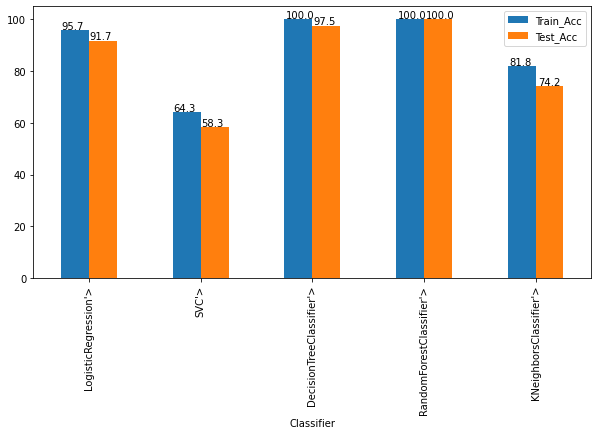

In [71]:
print("\n********************Testing the model performance with shuffled sample dataset**************\n")
measures_df = classification_model(trainX, testX, trainY, testY)
ax=measures_df.plot.bar(x='Classifier')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Part I.2 --
        train_test_split with shuffle = False**



********************Testing the model performance with non shuffled sample dataset**************


 ********<'Measures for model LogisticRegression'> **********
Accuracy of model on train data : 96.8% 
Accuracy of model on test data: 84.2% 
F1 score of model : [0.         0.91402715] 

 ********<'Measures for model SVC'> **********
Accuracy of model on train data : 89.3% 
Accuracy of model on test data: 0.0% 
F1 score of model : [0. 0.] 

 ********<'Measures for model DecisionTreeClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 83.3% 
F1 score of model : [0.         0.90909091] 


C:\Users\reenanagrale\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



 ********<'Measures for model RandomForestClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 96.7% 
F1 score of model : [0.         0.98305085] 

 ********<'Measures for model KNeighborsClassifier'> **********
Accuracy of model on train data : 91.1% 
Accuracy of model on test data: 10.0% 
F1 score of model : [0.         0.18181818] 


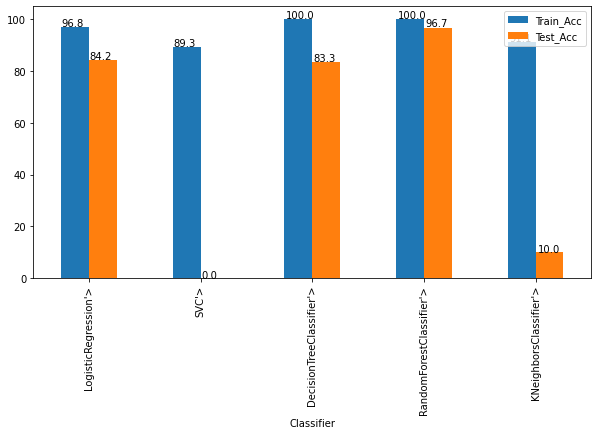

In [72]:
#train_test_split with shuffle = False
trainX_F, testX_F, trainY_F, testY_F = train_test_split(X_df,Y_df,test_size=0.30,random_state=0,shuffle=False)

print("\n********************Testing the model performance with non shuffled sample dataset**************\n")
measures_df=classification_model(trainX_F, testX_F, trainY_F, testY_F)
ax=measures_df.plot.bar(x='Classifier')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**Part I.3. Model performance with scaled data**


********************Testing the model performance with shuffled Scaled dataset**************


 ********<'Measures for model LogisticRegression'> **********
Accuracy of model on train data : 99.3% 
Accuracy of model on test data: 95.0% 
F1 score of model : [0.95945946 0.93478261] 

 ********<'Measures for model SVC'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 95.8% 
F1 score of model : [0.96644295 0.94505495] 

 ********<'Measures for model DecisionTreeClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 95.8% 
F1 score of model : [0.96551724 0.94736842] 

 ********<'Measures for model RandomForestClassifier'> **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 98.3% 
F1 score of model : [0.98630137 0.9787234 ] 

 ********<'Measures for model KNeighborsClassifier'> **********
Accuracy of model on train data : 97.5% 
Accuracy of model on test data: 93.3% 
F1 score of 

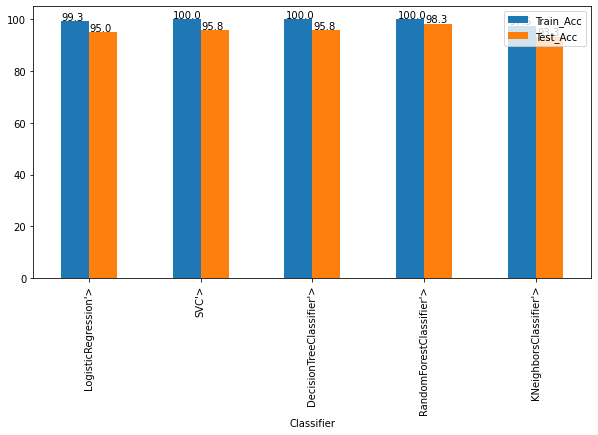

In [73]:
trainX_1, testX_1, trainY_1, testY_1 = train_test_split(scaled_features,Y_df,test_size=0.30,random_state=0,shuffle=True)
print("\n********************Testing the model performance with shuffled Scaled dataset**************\n")
measures_df=classification_model(trainX_1, testX_1, trainY_1, testY_1)
ax=measures_df.plot.bar(x='Classifier')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# <font color='green'> Observation: 
With shuffled sample, we observe that - 

    Perdiction by Decision Tree algorithm and RandomForest Classifier helps to achieve 100% of accuracy, whereas other classifiers with default parameters gives lesser accuracy as compared to these two.However, these classifiers gives better performance as we have smaller dataset.
    We observe that Logistic Regression gives 95.7% of accuracy on training data and little lesser accuracy on test data.
    SVC and KNN algorithms gives very poor performance in terms of accuracy of perdiction. We need to understand if the optimizing these algorithms by changing the tuning parameters helps to improve the performance.
    
With non shuffled sample, we observe that - 

    We clearly observe that performance of each algorithms have reduced on the test data and this could be due to sampling issues. So, its always suggested to work on to improve the samples of training data as to avoid algorithm work better on unseen data. We would not implement the sampling techniques for this assignment as dataset provided to us is not sufficient.
    
**With Scaled data we surely observe the improvement in the performance of each classifier. Random Forest Classifier performs better on train and test data.** 
    
**Part 1.4 Lets understand feature importance from Random Forest Classifier.**
    

In [74]:
RFC = RandomForestClassifier()
RFC_model = RFC.fit(trainX_1,trainY_1.values.ravel())
predicted_y = RFC_model.predict(testX_1)

train_acc = round(RFC_model.score(trainX_1,trainY_1)*100,1)
test_acc = round(accuracy_score(predicted_y,testY_1)*100,1)
print("\n ********<'Measures for model {} **********".format('RandomForestClassifier'))
print("Accuracy of model on train data : {}% ".format(train_acc))
print("Accuracy of model on test data: {}% ".format(test_acc))
print("Precision of model:{}".format(precision_score(testY_1,predicted_y,average=None)))
print("F1 score of model : {} ".format(f1_score(testY_1,predicted_y,average=None)))



 ********<'Measures for model RandomForestClassifier **********
Accuracy of model on train data : 100.0% 
Accuracy of model on test data: 100.0% 
Precision of model:[1. 1.]
F1 score of model : [1. 1.] 


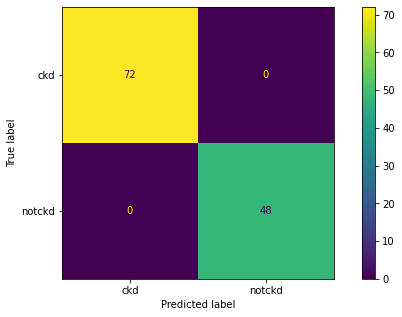

In [75]:
plot_confusion_matrix(RFC_model,testX_1,testY_1)

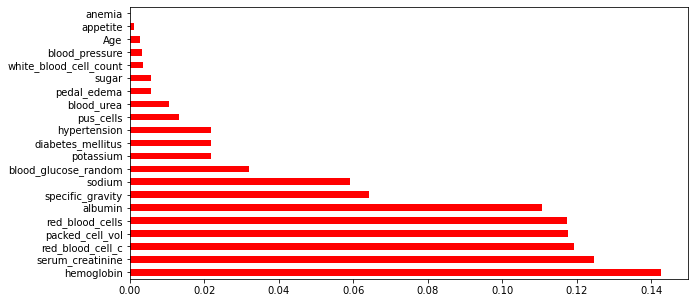

In [76]:
feat_importances = pd.Series(RFC_model.feature_importances_, index=new_numerical_cols+new_categorical_cols)
feat_importances.nlargest(25).plot(kind='barh', color='red')


In [77]:
LR = LogisticRegression()
LR_model = LR.fit(trainX_1,trainY_1.values.ravel())
predicted_y = LR_model.predict(testX_1)

train_acc = round(LR_model.score(trainX_1,trainY_1)*100,1)
test_acc = round(accuracy_score(predicted_y,testY_1)*100,1)
print("\n ********<'Measures for model {} **********".format('LogisticRegression'))
print("Accuracy of model on train data : {}% ".format(train_acc))
print("Accuracy of model on test data: {}% ".format(test_acc))
print("Precision of model:{}".format(precision_score(testY_1,predicted_y,average=None)))
print("F1 score of model : {} ".format(f1_score(testY_1,predicted_y,average=None)))


 ********<'Measures for model LogisticRegression **********
Accuracy of model on train data : 99.3% 
Accuracy of model on test data: 95.0% 
Precision of model:[0.93421053 0.97727273]
F1 score of model : [0.95945946 0.93478261] 


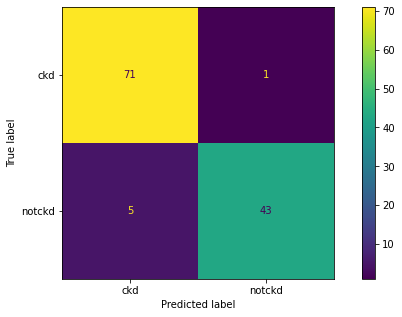

In [78]:
plot_confusion_matrix(LR_model,testX_1,testY_1)

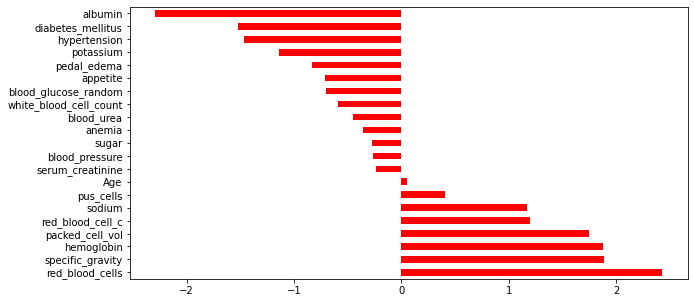

In [79]:
feat_importances = pd.Series(LR_model.coef_[0], index=new_numerical_cols+new_categorical_cols)
feat_importances.nlargest(25).plot(kind='barh', color='red')

# <font color='green'> Observation: 
   Random Forest Classifier model shows hemoglobin, packed_cell_volume, sc and specific gravity features more likely to helps in predicting the target with accuracy.
    Whereas, Logistic Regression shows list of important features that helps in prediction. 

# <font color='Green'>**CONCLUSION**

We have started with Data Loading, Cleansing the data,Data Exploration. We performed data transformation and feature selection that would be useful for model building.
We also build different classification model as the target variable had nominal values. 

With our observations of accuracy measure of different models, we conclude that Random Forest Classifier, Decision Tree and Logistic Regression performs best prediction on the given set on data when scaled with min-max normalizer.
</font>

# Thank You - From Group 102

Reena Nagrale - 2021fa04035@wilp.bits-pilani.ac.in

Ankur Gupta - 2021fa04040@wilp.bits-pilani.ac.in

Pratiti Shah - 2021fa04031@wilp.bits-pilani.ac.in
